# 🌸 Clasificación de Flores Iris con Machine Learning

## Contenido:
* [Introducción](#introducción)
* [Carga de datos e Inspección](#Carga-de-datos-e-Inspección)
* [Análisis Exploratorio de Datos (EDA)](#Análisis-Exploratorio-de-Datos-(EDA))
* [Limpieza de Datos y Preprocesamiento](#Limpieza-de-Datos-y-Preprocesamiento)
* [Entrenamiento de Modelos y Evaluación](#Entrenamiento-de-Modelos-y-Evaluación)
* [Conclusión](#Conclusión)

## **Introducción:**

Este proyecto utiliza el clásico dataset de *Iris* para demostrar cómo aplicar aprendizaje automático para clasificar flores en tres especies: *Iris-setosa*, *Iris-versicolor* e *Iris-virginica* 🌺.

### Objetivo
Entrenar modelos de clasificación que predigan correctamente la especie de una flor basándose en el largo y ancho de sus sépalos y pétalos.

### Dataset
Contiene 150 registros con las siguientes características:
- Longitud y ancho del sépalo (cm)
- Longitud y ancho del pétalo (cm)
- Especie (etiqueta)

## **Carga de datos e Inspección**

In [2]:
# Carga de datos e inspección

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")


# Cargar el dataset desde el archivo CSV
df = pd.read_csv("Iris.csv")

# Inspeccionar las primeras filas del DataFrame
df.head()




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Obtener información general del DataFrame (tipos de datos, no nulos)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Ver las últimas 5 filas
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Mostrar las dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (150, 6)


In [6]:
# Verificar la existencia de valores nulos o faltantes en cada columna
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Ver estadísticas numéricas para las columnas correspondientes
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:

#Mostrar el nombre de las columnas 
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#Eliminar la columna "Id"
df = df.drop(columns=["Id"])

In [10]:
#Renombrar columnas a minúsculas y con guiones 
df.columns = df.columns.str.lower().str.replace("cm", "").str.replace(" ", "_")

In [11]:
#Mostrar las primeras filas para verificar los cambios en el dataframe
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **Análisis Exploratorio de Datos (EDA)**

### Pairplot (Gráfico de Pares)

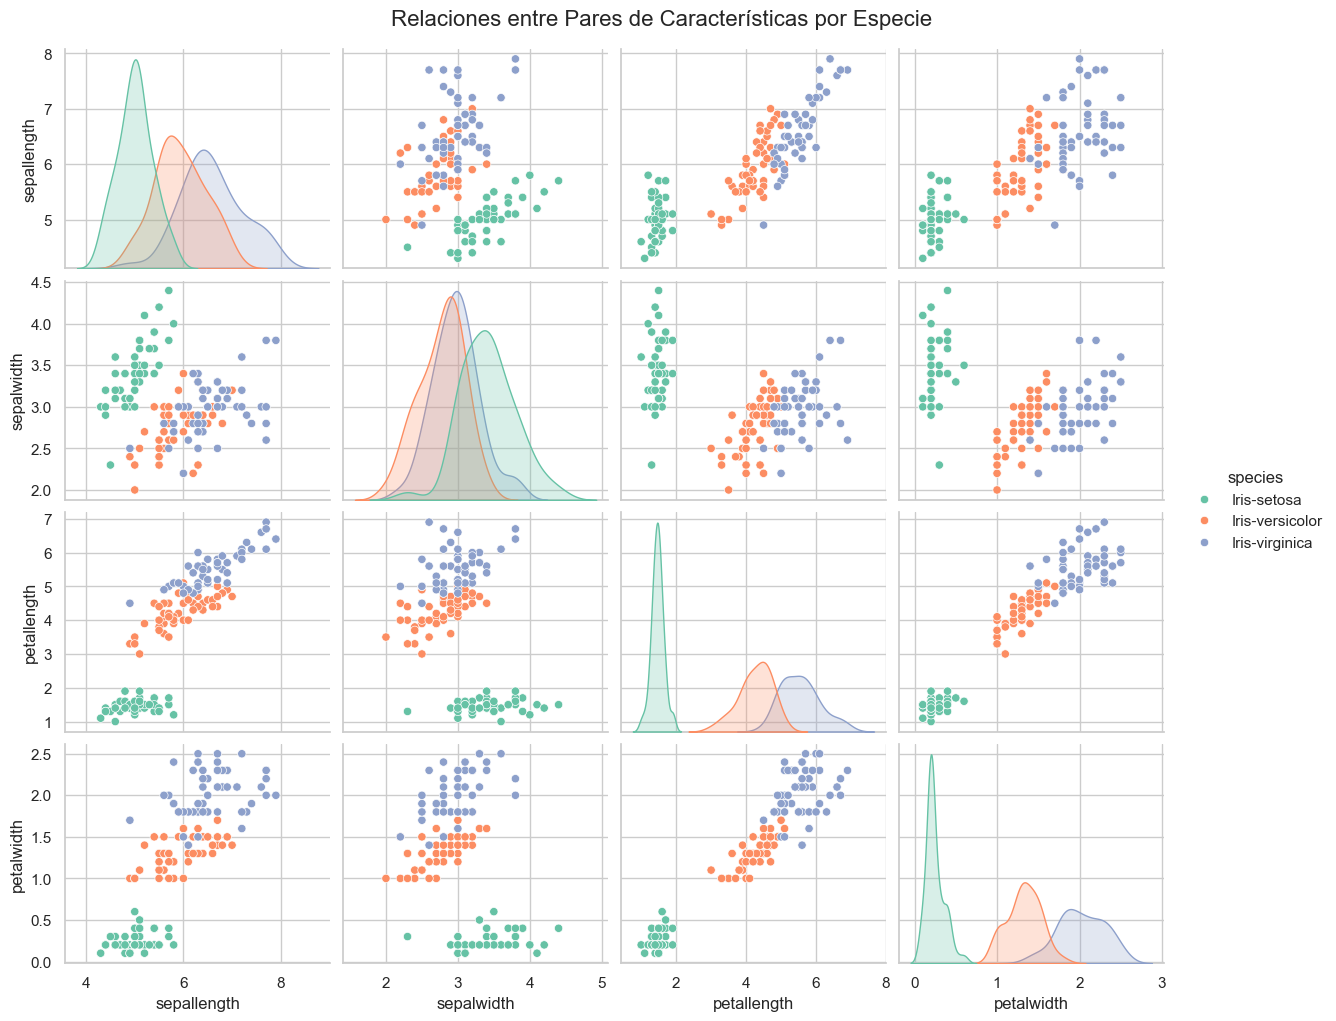

In [12]:
# Gráfico de pares (pairplot) para visualizar relaciones bivariadas, coloreado por especie
sns.pairplot(df, hue="species", palette="Set2",height= 2.5, aspect=1.2)
plt.suptitle('Relaciones entre Pares de Características por Especie', y=1.02, size=16)
plt.show()

### Interpretación del Gráfico de Pares: Relaciones entre Características por Especie

El gráfico de pares muestra las relaciones bivariadas entre las características del conjunto de datos de **Iris** (`sepal length`, `sepal width`, `petal length`, `petal width`), diferenciadas por especie (`Iris-setosa`, `Iris-versicolor`, `Iris-virginica`) mediante colores distintos.

* **Iris-setosa** (verde):

  * Se distingue claramente de las otras dos especies en las variables relacionadas con el **pétalo** (`petal length` y `petal width`).
  * Sus pétalos son notablemente más pequeños que los de las otras especies, lo que crea una separación clara en las gráficas de dispersión.
  * Muestra menos variabilidad interna en sus medidas.

* **Iris-versicolor** (naranja) y **Iris-virginica** (azul):

  * Estas dos especies se superponen parcialmente en varias combinaciones de características, especialmente en `sepal length` y `sepal width`.
  * Sin embargo, se logra cierta diferenciación en los gráficos que involucran `petal length` y `petal width`, aunque no tan marcada como en el caso de la setosa.

Este gráfico de pares permite visualizar cómo las características morfológicas de las flores se agrupan según la especie. Es especialmente útil para identificar qué variables ofrecen mayor poder discriminante. En este caso, **las medidas del pétalo** (longitud y ancho) son más eficaces para separar las especies, lo que puede ser clave para modelos de clasificación.



### Heatmap (Mapa de Calor)

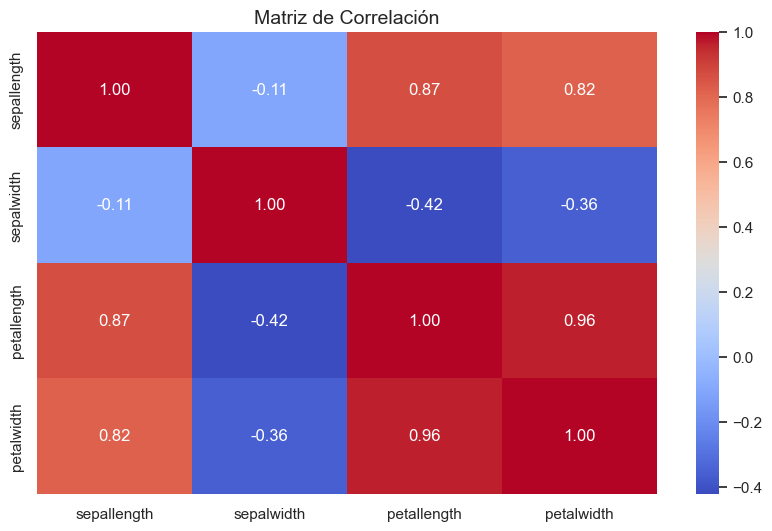

In [13]:
# Matriz de correlación para cuantificar la relación lineal entre variables
plt.figure(figsize=(10, 6))
# Usamos df.corr(numeric_only=True) para calcular la correlación solo en columnas numéricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación", size=14)
plt.show()

### Matriz de Correlación - Conjunto de Datos Iris

La matriz de correlación nos permite entender la relación lineal entre las diferentes características (features) de las flores en el dataset Iris. A continuación, se analizan las correlaciones más relevantes:

* 🔹 **PetalLength y PetalWidth**:
  Correlación muy alta (**0.96**). Esto indica una relación fuertemente positiva: a mayor largo del pétalo, mayor será su ancho. Estas variables son casi linealmente dependientes.

* 🔹 **PetalLength y SepalLength**:
  Alta correlación (**0.87**). Sugiere que el largo del pétalo también aumenta con el largo del sépalo, aunque no tan fuerte como con el ancho del pétalo.

* 🔹 **PetalWidth y SepalLength**:
  Correlación positiva alta (**0.82**), lo que refuerza que las dimensiones del pétalo y sépalo están relacionadas.

* 🔹 **SepalWidth y las demás variables**:
  Presenta correlaciones negativas moderadas:

  * Con PetalLength: **-0.42**
  * Con PetalWidth: **-0.36**
  * Con SepalLength: **-0.11**
    Esto indica que el ancho del sépalo tiende a disminuir cuando las otras variables aumentan.

### Boxplot (Gráfico de Caja)

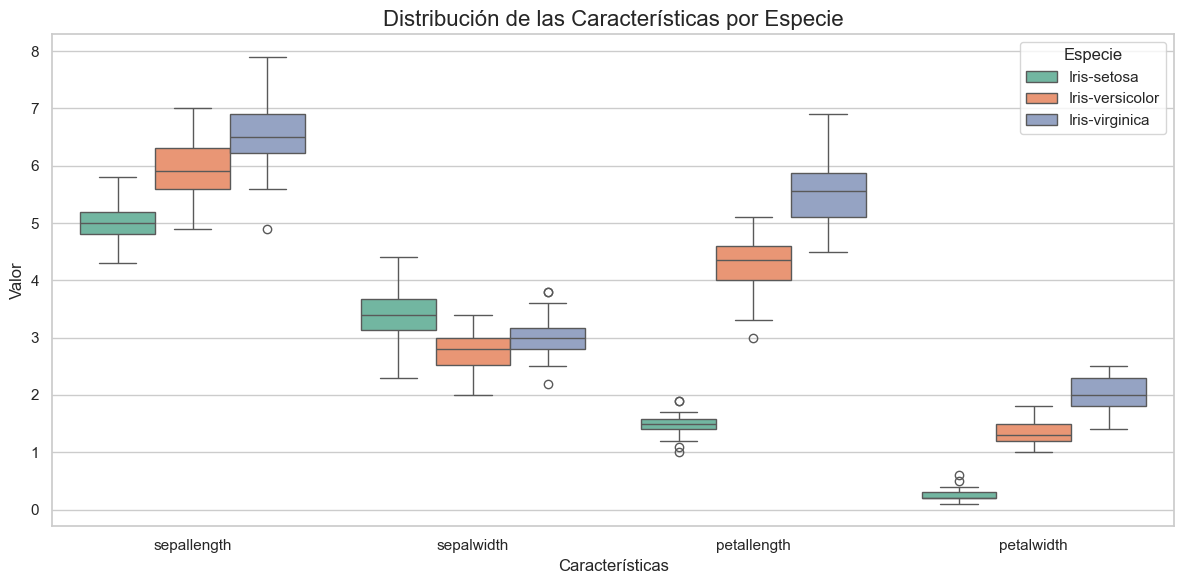

In [14]:
# Reorganizamos el DataFrame para tener columnas 'species', 'feature' y 'value'
df_melted = pd.melt(df, id_vars="species", value_vars=["sepallength", "sepalwidth", "petallength", "petalwidth"],
                    var_name="feature", value_name="value")

plt.figure(figsize=(12, 6))
sns.boxplot(x="feature", y="value", hue="species", data=df_melted, palette="Set2")

plt.title("Distribución de las Características por Especie", fontsize=16)
plt.xlabel("Características")
plt.ylabel("Valor")
plt.legend(title="Especie")
plt.tight_layout()
plt.show()

### Análisis de Boxplots por Especie de Flor - Conjunto de Datos *Iris*

El siguiente gráfico muestra boxplots comparando las cuatro características principales de las flores del conjunto de datos *Iris*: **longitud y ancho del sépalo** (`sepal length`, `sepal width`) y **longitud y ancho del pétalo** (`petal length`, `petal width`), agrupadas por especie: *setosa*, *versicolor* y *virginica*.

* **Petal Length y Petal Width** son las variables que **mejor separan** visualmente a las tres especies.

  * *Setosa* tiene pétalos claramente más cortos y delgados que las otras dos especies.
  * *Virginica* tiene los pétalos más largos y anchos.
  * *Versicolor* se encuentra en un rango intermedio.

* En contraste, **Sepal Length y Sepal Width** presentan **más solapamiento entre especies**, especialmente entre *versicolor* y *virginica*.
  Esto sugiere que no son tan útiles para la clasificación por sí solas.

* Se observan **outliers (valores atípicos)** en algunas especies, especialmente en `sepal width` de *setosa* y *virginica*.
  Aunque son pocos, vale la pena tenerlos en cuenta si se va a aplicar un modelo sensible a valores extremos, como una regresión lineal.


### Scatter Plot (Gráfico de Dispersión)

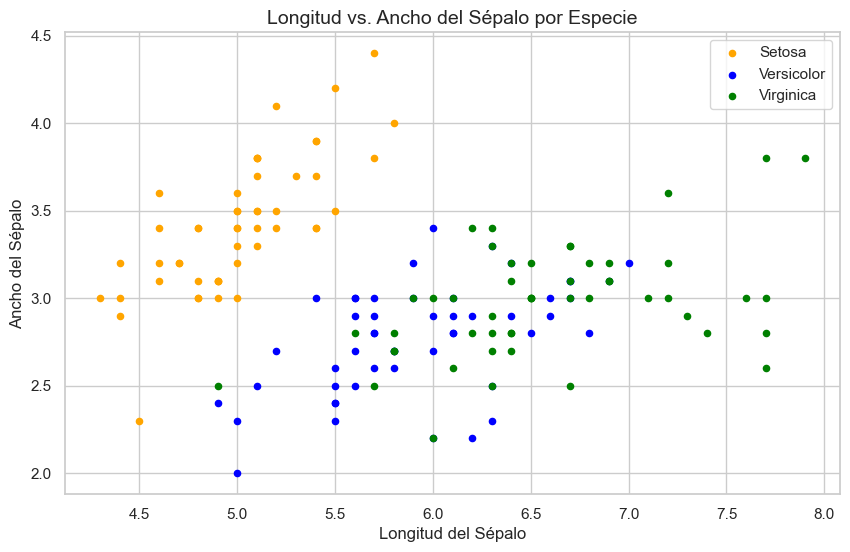

In [15]:
# Gráfico de dispersión (Scatter Plot) de Longitud vs. Ancho del Sépalo
fig = df[df.species=='Iris-setosa'].plot(kind='scatter', x='sepallength', y='sepalwidth', color='orange', label='Setosa', figsize=(10, 6))
df[df.species == 'Iris-versicolor'].plot(kind='scatter', x='sepallength', y='sepalwidth', color='blue', label='Versicolor', ax=fig)
df[df.species == 'Iris-virginica'].plot(kind='scatter', x='sepallength', y='sepalwidth', color='green', label='Virginica', ax=fig) 
fig.set_xlabel("Longitud del Sépalo")
fig.set_ylabel("Ancho del Sépalo")
fig.set_title("Longitud vs. Ancho del Sépalo por Especie", size=14)
plt.legend()
plt.show()



### Interpretación del Gráfico de Dispersión: Longitud vs. Ancho del Sépalo por Especie (Conjunto de Datos Iris)

Este gráfico de dispersión presenta la distribución de tres especies de la flor Iris (Setosa, Versicolor y Virginica) basándose en dos de sus características morfológicas: la longitud del sépalo y el ancho del sépalo.

1.  **Iris Setosa (Naranja):**
    * Los puntos que representan a la especie Setosa están claramente agrupados en la **esquina inferior izquierda** del gráfico.
    * Esta agrupación indica que las flores Iris Setosa tienden a tener **sépalos más cortos y, a menudo, más anchos** en comparación con las otras dos especies.
    * Es evidente una **separación casi perfecta** de la Setosa con respecto a las especies Versicolor y Virginica. Esto sugiere que la longitud y el ancho del sépalo son características muy efectivas y distintivas para identificar y clasificar la Iris Setosa.

2.  **Iris Versicolor (Azul) e Iris Virginica (Verde):**
    * A diferencia de la Setosa, estas dos especies muestran un **grado de solapamiento significativo** entre sí en el centro y la parte superior derecha del gráfico.
    * **Iris Versicolor (Azul):** Ocupa una región intermedia. Sus sépalos tienen longitudes y anchos que se sitúan entre los de la Setosa y la Virginica.
    * **Iris Virginica (Verde):** Predomina en la parte **superior derecha** del gráfico, indicando que sus sépalos son generalmente **más largos**. Aunque también se solapa con Versicolor, tiende hacia valores mayores de longitud de sépalo.
    * El solapamiento entre Versicolor y Virginica implica que, basándose únicamente en la longitud y el ancho del sépalo, podría ser más difícil diferenciarlas con total precisión en comparación con la Setosa.

### Violinplot (Gráfico de Violín)

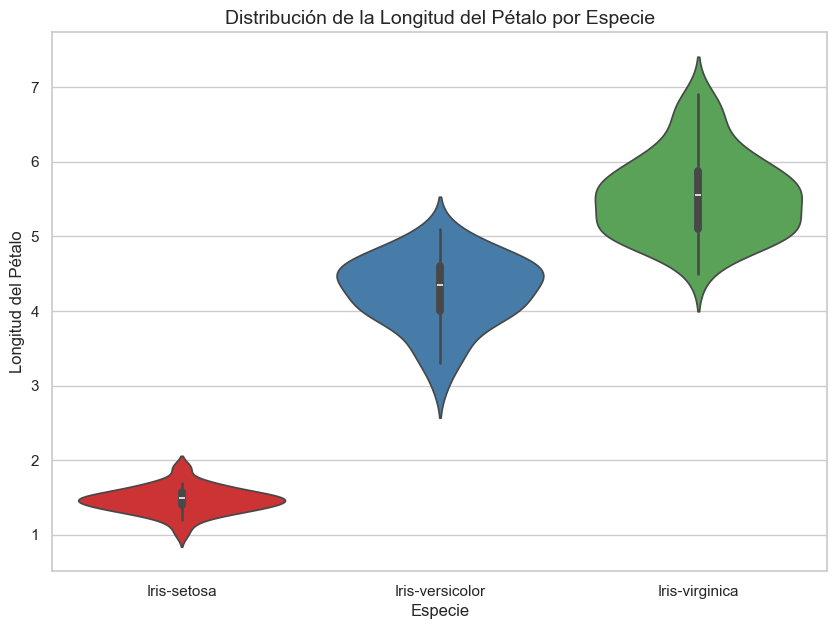

In [16]:
# Gráfico de violín (Violinplot) para comparar la longitud del pétalo
plt.figure(figsize=(10, 7))
sns.violinplot(data=df, x='species', y='petallength', hue='species', palette="Set1", legend=False)
plt.title("Distribución de la Longitud del Pétalo por Especie", size=14)
plt.xlabel("Especie")
plt.ylabel("Longitud del Pétalo")
plt.show()

### Interpretación del Gráfico de Violín: Distribución de la Longitud del Pétalo por Especie

Este gráfico de violín es una representación visual detallada de cómo la **longitud del pétalo** varía entre las tres especies de la flor Iris (Iris-setosa, Iris-versicolor e Iris-virginica). Combina las ventajas de un diagrama de caja (box plot) con una estimación de la densidad de probabilidad (curva de densidad) para mostrar no solo la dispersión, sino también la forma de la distribución de los datos.

1.  **Iris-setosa (Rojo):**
    * El violín para `Iris-setosa` es notablemente **el más corto y el de menor longitud de pétalo**. Su rango se sitúa aproximadamente entre 1.0 cm y 2.0 cm.
    * La forma es compacta y estrecha, lo que sugiere una **distribución muy concentrada** con baja variabilidad en la longitud de sus pétalos. La mayoría de los pétalos de Setosa tienen longitudes muy similares.
    * Hay una **separación absoluta** de esta especie con respecto a las otras dos; no hay solapamiento en sus rangos de longitud de pétalo, lo que la hace muy fácil de identificar basándose únicamente en esta característica.

2.  **Iris-versicolor (Azul):**
    * Este violín se encuentra en un **rango de longitud de pétalo intermedio**, aproximadamente entre 3.0 cm y 5.5 cm.
    * Su distribución es relativamente simétrica, con la mayor concentración de datos alrededor de la mediana, que se ubica en torno a los 4.5 cm.
    * Aunque hay un solapamiento con la cola inferior de la distribución de `Iris-virginica`, la densidad de datos de Versicolor está claramente centrada en un rango más bajo que Virginica.

3.  **Iris-virginica (Verde):**
    * El violín de `Iris-virginica` es **el más largo y ocupa el rango superior** de longitudes de pétalo, aproximadamente entre 4.5 cm y 7.0 cm.
    * Esta especie presenta los pétalos más largos. La distribución muestra una concentración en valores más altos, aunque también exhibe una cola que se extiende hacia valores más bajos, lo que explica el solapamiento con `Iris-versicolor` en las longitudes de pétalo más pequeñas de Virginica y las más grandes de Versicolor.

## **Limpieza y Preprocesamiento de Datos**

#### 1. Separación de características y variable objetivo
- Separamos las columnas en:
  - **X**: características numéricas (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`).
  - **y**: variable objetivo (`species`).

#### 2. Codificación de la variable objetivo
- La columna `species` contiene valores categóricos (`setosa`, `versicolor`, `virginica` ).
- Usamos **LabelEncoder** para transformarlos en valores numéricos (`0, 1, 2`).

#### 3. División en entrenamiento y prueba
- Separamos el dataset en entrenamiento (80%) y prueba (20%).
- Usamos `stratify=y` para mantener la proporción de clases balanceada.

#### 4. Escalado de características (opcional)
- Aunque el dataset Iris tiene todas las variables en la misma escala (cm), algunos modelos se benefician de la normalización.
- Usamos `StandardScaler`.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Preparación de los datos para el modelo
# 1. Separar características (X) y objetivo (y)
X = df.drop('species', axis=1)
y = df['species']

# 2. Codificar la variable objetivo (y)
le = LabelEncoder()
y = le.fit_transform(y)
# y ahora contendrá 0, 1, 2 en lugar de los nombres de las especies

# 3. Dividir los datos en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Escalar las características (opcional, pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (120, 4)
Dimensiones del conjunto de prueba: (30, 4)


## **Entrenamiento de Modelos y Evaluación**

En este paso entrenaremos y compararemos diferentes algoritmos de **Machine Learning supervisado** aplicados al dataset **Iris**.  
Cada modelo tiene un enfoque distinto y nos permitirá ver cuál se adapta mejor a este problema de clasificación multiclase.

#### 1. Regresión Logística (`LogisticRegression`)
- Modelo lineal muy usado como **baseline**.  
- Ventajas: rápido, interpretable y buen punto de referencia.  
- Limitaciones: puede no capturar relaciones no lineales.

#### 2. K-Nearest Neighbors (`KNeighborsClassifier`)
- Basado en la similitud entre instancias (distancias).  
- Ventajas: sencillo e intuitivo.  
- Limitaciones: sensible al número de vecinos y a la escala de datos.

#### 3. Support Vector Machines (`SVC(kernel="linear")`)
- Encuentra el **hiperplano óptimo** para separar clases.
- En este caso usamos un **kernel lineal**, lo que significa que el modelo buscará una separación lineal entre las clases.
- Ventajas: funciona muy bien con datasets pequeños y de pocas dimensiones como Iris.
- Limitaciones: puede ser más lento que `LinearSVC` en datasets grandes, pero aquí es suficiente y muy preciso.

#### 4. Random Forest (`RandomForestClassifier`)
- Ensamble de múltiples árboles de decisión.  
- Ventajas: robusto, maneja relaciones no lineales y reduce sobreajuste.  
- Limitaciones: menos interpretable que un árbol individual.

#### 5. Gradient Boosting (`GradientBoostingClassifier`)
- Método de ensamble que construye árboles secuencialmente para **mejorar errores previos**.  
- Ventajas: alta precisión, muy usado en la práctica.  
- Limitaciones: más lento de entrenar, sensible al ajuste de hiperparámetros.

### Evaluación
Se entrenarán los cinco modelos con los datos de entrenamiento y se evaluará su desempeño con **Accuracy** en el conjunto de prueba.

A cada modelo se le evaluará con:
- **Accuracy** (precisión global).
- **Reporte de Clasificación** (precision, recall, f1-score).
- **Matriz de Confusión** (errores y aciertos por clase).

De esta forma podremos comparar el rendimiento de los modelos y seleccionar el más adecuado para el dataset **Iris**.


Modelo: Regresión Logística
Precisión (Accuracy): 0.9333

--- Reporte de Clasificación ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



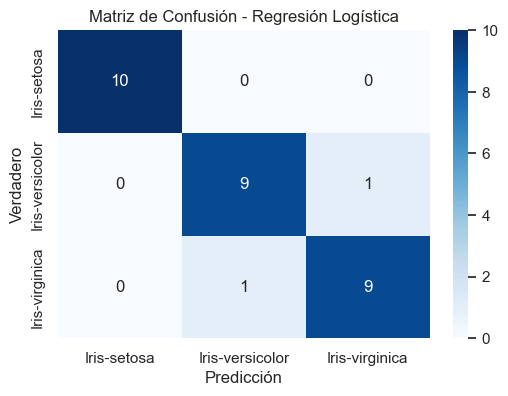


Modelo: KNN
Precisión (Accuracy): 0.9333

--- Reporte de Clasificación ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



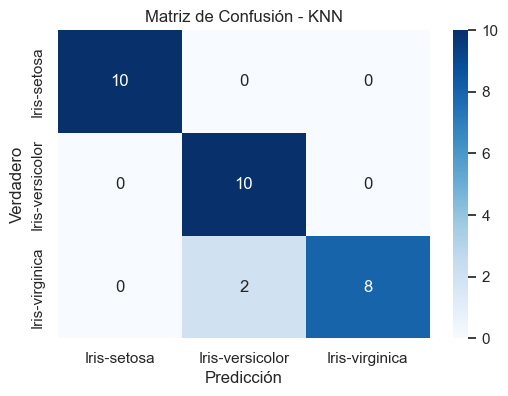


Modelo: SVM (lineal)
Precisión (Accuracy): 1.0000

--- Reporte de Clasificación ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



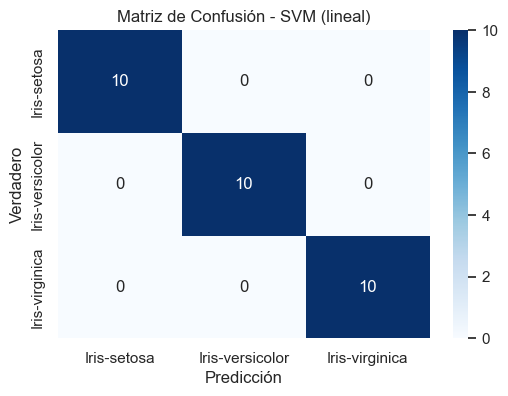


Modelo: Random Forest
Precisión (Accuracy): 0.9000

--- Reporte de Clasificación ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



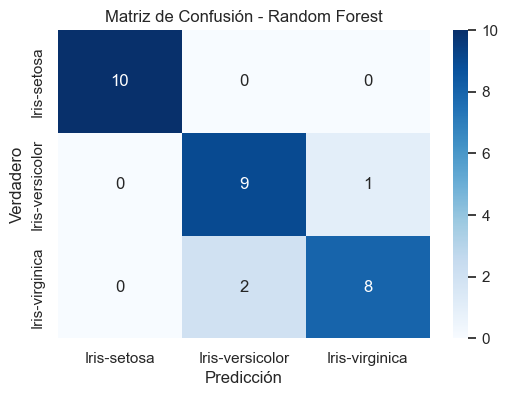


Modelo: Gradient Boosting
Precisión (Accuracy): 0.9000

--- Reporte de Clasificación ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



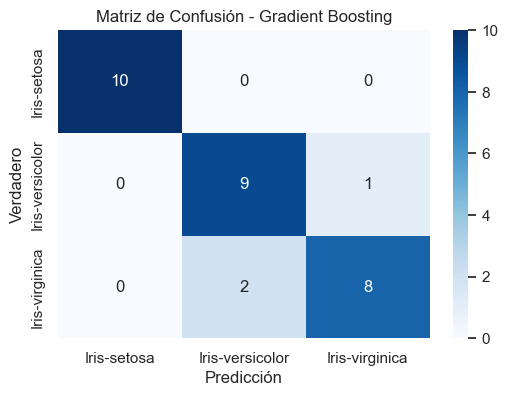

In [18]:
# Importar los modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definir modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (lineal)": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Entrenar y evaluar
for nombre, modelo in modelos.items():
    print(f"\n==============================")
    print(f"Modelo: {nombre}")
    print("==============================")

    # Entrenar
    modelo.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Precisión (Accuracy): {acc:.4f}")

    # Reporte de clasificación
    print("\n--- Reporte de Clasificación ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.show()


## Comparación de Modelos de Clasificación en el Dataset Iris

Hemos entrenado y evaluado cinco modelos diferentes: Regresión Logística, KNN, SVM (lineal), Random Forest y Gradient Boosting. A continuación se presentan los resultados obtenidos en términos de accuracy, métricas de clasificación y matrices de confusión.

#### 1. **Regresión Logística**
- **Accuracy:** 93.3%
- **Fortalezas:** Clasifica perfectamente Setosa.
- **Debilidades:** Confunde levemente entre Versicolor y Virginica.
- **Matriz de Confusión:**
  - 10/10 Setosa correctas.
  - 1 error Versicolor ↔ Virginica.

#### 2. **K-Nearest Neighbors (KNN, k=5)**
- **Accuracy:** 93.3%
- **Fortalezas:** Identifica sin error a Setosa y Versicolor (recall=1.0 para ambas).
- **Debilidades:** Confunde más que la regresión logística entre Virginica y Versicolor (2 errores).
- **Matriz de Confusión:**
  - 10/10 Setosa.
  - 10/10 Versicolor, pero recibió 2 Virginica mal clasificadas.
  - 8/10 Virginica.

#### 3. **Support Vector Machine (SVM - lineal)**
- **Accuracy:** 100%
- **Fortalezas:** Clasifica correctamente **todas las especies sin errores.**
- **Debilidades:** Ninguna en este caso (pero puede ser sensible a datos con ruido o outliers en datasets más complejos).
- **Matriz de Confusión:**
  - 10/10 correctas para cada clase.
  - **Cero confusiones.**

#### 4. **Random Forest**
- **Accuracy:** 90%
- **Fortalezas:** Buena clasificación general.
- **Debilidades:** Menor rendimiento en Versicolor y Virginica.
- **Matriz de Confusión:**
  - Setosa: 10/10 correctas.
  - Versicolor: 9 correctas, 1 error.
  - Virginica: 8 correctas, 2 errores.

#### 5. **Gradient Boosting**
- **Accuracy:** 90%
- **Fortalezas:** Similar a Random Forest, buen desempeño en general.
- **Debilidades:** Misma confusión que Random Forest en Versicolor y Virginica.
- **Matriz de Confusión:**
  - Setosa: 10/10 correctas.
  - Versicolor: 9 correctas, 1 error.
  - Virginica: 8 correctas, 2 errores.

### Trabajo Futuro y Recomendaciones

- **SVM** es el modelo ganador en Iris, pero en datasets más grandes o con ruido puede perder rendimiento. Se recomienda probar **SVM con kernel RBF** para casos no lineales.
- Para **Random Forest y Gradient Boosting,** se puede mejorar el desempeño con:
   - Ajuste de hiperparámetros (`n_estimators, max_depth, learning_rate`).
   - Uso de **validación cruzada** para asegurar estabilidad del modelo.
- Explorar técnicas de **reducción de dimensionalidad** (PCA, LDA) para visualizar mejor la separación entre Versicolor y Virginica.
- En un escenario real, sería interesante comparar también con **Redes Neuronales o modelos Ensamblados** (votar entre varios clasificadores).

## **Conclusión:**
En el dataset Iris, **SVM lineal** es claramente el mejor modelo. Sin embargo, en trabajos futuros con datos más complejos, se recomienda explorar **SVM con kernels no lineales** o **Gradient Boosting optimizado** para obtener un balance entre precisión y robustez.

#### Guardar todos los Modelos 

In [19]:
# Guardar los modelos entrenados usando joblib
import joblib
import os

# Crear el directorio 'models' si no existe
if not os.path.exists('models'):
    os.makedirs('models')

# Usar el diccionario 'modelos' ya existente con los modelos entrenados
for nombre, modelo in modelos.items():
    filename = f"models/{nombre}_iris_classifier.pkl"
    joblib.dump(modelo, filename)
    print(f" Modelo '{nombre}' guardado en: {filename}")

print("\nTodos los modelos se han guardado exitosamente.")


 Modelo 'Regresión Logística' guardado en: models/Regresión Logística_iris_classifier.pkl
 Modelo 'KNN' guardado en: models/KNN_iris_classifier.pkl
 Modelo 'SVM (lineal)' guardado en: models/SVM (lineal)_iris_classifier.pkl
 Modelo 'Random Forest' guardado en: models/Random Forest_iris_classifier.pkl
 Modelo 'Gradient Boosting' guardado en: models/Gradient Boosting_iris_classifier.pkl

Todos los modelos se han guardado exitosamente.
